# Boston_House_price

In [1]:
#required libraries
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro, kstest, normaltest

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data 
boston_data = load_boston()
dir(boston_data)

C:\Users\UmaM2\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [3]:
#loading data 
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['TARGET'] = boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

# feature selection

1.Linearity 

In [7]:
df.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [8]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
TARGET        84.586724
dtype: float64

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


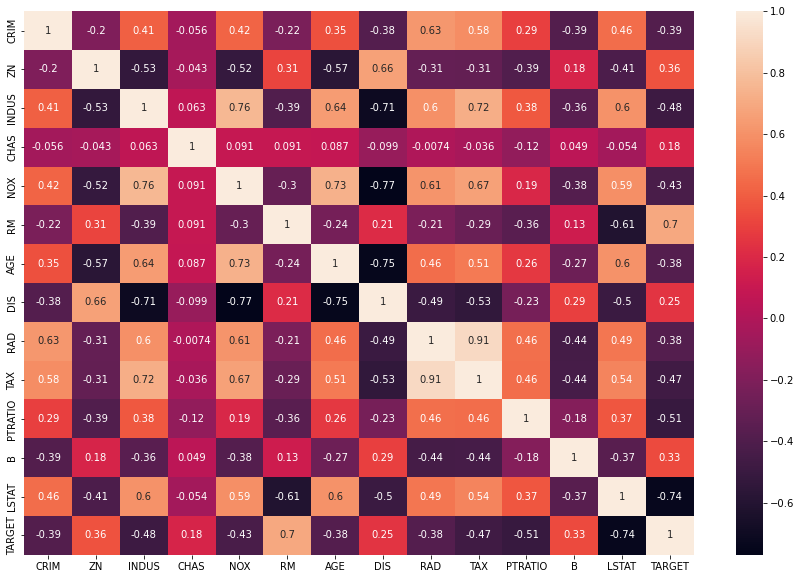

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Correlation.png')

In [11]:
correlation = df.corr().tail(1)

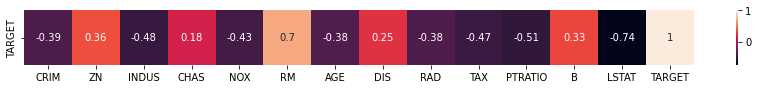

In [12]:
plt.figure(figsize = (15,1))
sns.heatmap(correlation,annot = True)
plt.savefig('Correlation_target.png')

no Multicolinearity

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [14]:
df.shape[1]

14

In [15]:
for i in range(df.shape[1] -1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"vif of {df.columns[i]}: ",vif)

vif of CRIM:  2.1314042398916406
vif of ZN:  2.9100040831335887
vif of INDUS:  14.485874343285056
vif of CHAS:  1.1762659532928834
vif of NOX:  74.00426852716569
vif of RM:  136.1017425464841
vif of AGE:  21.39886253165994
vif of DIS:  15.430455486916713
vif of RAD:  15.369979849775836
vif of TAX:  61.93971317434026
vif of PTRATIO:  87.22723281176584
vif of B:  21.35101506934191
vif of LSTAT:  12.615187641345367


In [16]:
x = df.drop('TARGET',axis = 1)
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot:>

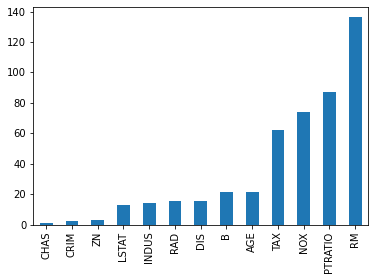

In [17]:
vif_list = []
for i in range(df.shape[1] -1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = 'bar')

# Model Training

In [18]:
x = df.drop('TARGET',axis = 1) # 2D
y = df['TARGET'] # 1D

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


Instantiating Linear Regression model

In [19]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [20]:
linear_reg.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [21]:
linear_reg.intercept_

36.53305138282446

# Evaluation 

In [22]:
y_pred = linear_reg.predict(x_test)

# Evaluation on Testing Data

In [23]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r_squared = r2_score(y_test, y_pred)


print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("Mean Absolute Error :",mae)
print("R Squared Value is :",r_squared)

Mean Squared Error : 34.41396845313846
Root Mean Squared Error : 5.866341999333014
Mean Absolute Error : 4.0614191829547055
R Squared Value is : 0.6709339839115638


In [24]:
r_squared = linear_reg.score(x_test,y_test) # r2 value
print("R Squared Value is :",r_squared)

R Squared Value is : 0.6709339839115638


In [25]:
r_squared = linear_reg.score(x_test,y_test) # r2 value
print("R Squared Value is :",r_squared)

R Squared Value is : 0.6709339839115638


In [26]:
y_pred_train = linear_reg.predict(x_train)

In [27]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.230858879373056
Root Mean Squared Error : 4.385300318036731
Mean Absolute Error : 3.0830955828177653
R Squared Value is : 0.750121534530608


In [28]:
r_squared = linear_reg.score(x_train, y_train) # r2 value
print("R Squared Value is :",r_squared)

R Squared Value is : 0.750121534530608


row_10 = x_train.iloc[10]
row_10

In [30]:
##R-Squared Values for all variables

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
x_train.iloc[:,:3]

,CRIM,ZN,INDUS
50,0.08873,21.0,5.64
367,13.52220,0.0,18.10
34,1.61282,0.0,8.14
78,0.05646,0.0,12.83
172,0.13914,0.0,4.05
...,...,...,...
320,0.16760,0.0,7.38
15,0.62739,0.0,8.14
484,2.37857,0.0,18.10
125,0.16902,0.0,25.65


In [33]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


In [34]:
correlation.T['TARGET']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
TARGET     1.000000
Name: TARGET, dtype: float64

In [35]:
r_squared_values_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1]+1):
    linear_reg = LinearRegression()
    linear_reg.fit(x_train.iloc[:,:i], y_train) 
    r_squared = linear_reg.score(x_train.iloc[:,:i], y_train) 
    r_squared_values_list.append(r_squared)
    
    adjusted_r2 = 1 - (((1-r_squared)*(x_train.shape[0] - 1))/(x_train.shape[0] -x_train.shape[1]-1 ))
    
    adj_r2_list.append(adjusted_r2)
r2_df = pd.DataFrame({'Correlation':correlation.T['TARGET'],"R2 Values":r_squared_values_list, "Adj R2":adj_r2_list}, 
                     index=x_train.columns)
r2_df

,Correlation,R2 Values,Adj R2
CRIM,-0.388305,0.154127,0.125931
ZN,0.360445,0.266503,0.242053
INDUS,-0.483725,0.328123,0.305727
CHAS,0.175260,0.357165,0.335737
NOX,-0.427321,0.359943,0.338607
RM,0.695360,0.568250,0.553859
AGE,-0.376955,0.569521,0.555172
DIS,0.249929,0.615983,0.603182
RAD,-0.381626,0.616248,0.603456
TAX,-0.468536,0.625064,0.612566


In [36]:

x_train.shape[1]+1

14

In [37]:



x_train.iloc[:,:1]

,CRIM
50,0.08873
367,13.52220
34,1.61282
78,0.05646
172,0.13914
...,...
320,0.16760
15,0.62739
484,2.37857
125,0.16902


In [38]:
x_train.iloc[:,:1].shape[1]

1

In [42]:
r_squared_values_list = []
adj_r2_list = []
row_count = x_train.shape[0] 
for i in range(1,x_train.shape[1]+1):
    linear_reg = LinearRegression()
    linear_reg.fit(x_train.iloc[:,:i], y_train) 
    r_squared = linear_reg.score(x_train.iloc[:,:i], y_train) 
    r_squared_values_list.append(r_squared)
    
    adjusted_r2 = 1 - (((1-r_squared)*(row_count - 1))/(row_count - x_train.iloc[:,:i].shape[1] -1 ))
    
    adj_r2_list.append(adjusted_r2)
r2_df = pd.DataFrame({'Correlation':correlation.T['TARGET'],"R2 Values":r_squared_values_list, "Adj R2":adj_r2_list}, 
                     index=x_train.columns)
r2_df

,Correlation,R2 Values,Adj R2
CRIM,-0.388305,0.154127,0.152022
ZN,0.360445,0.266503,0.262844
INDUS,-0.483725,0.328123,0.323084
CHAS,0.175260,0.357165,0.350721
NOX,-0.427321,0.359943,0.351902
RM,0.695360,0.568250,0.561725
AGE,-0.376955,0.569521,0.561912
DIS,0.249929,0.615983,0.608205
RAD,-0.381626,0.616248,0.607482
TAX,-0.468536,0.625064,0.615523


# assumptions of linear Regression

In [43]:
mse = (((y_train - y_pred_train) ** 2).sum())/404
mse

19.230858879373056

In [44]:
mae = ((np.abs(y_train - y_pred_train)).sum())/404
mae

3.0830955828177653

In [45]:
residual = y_train - y_pred_train
residual

50     -1.329586
367    10.881555
34     -0.247853
78      0.464848
172    -0.312624
         ...    
320    -1.045994
15      0.008068
484     1.432540
125    -1.006342
265    -5.770612
Name: TARGET, Length: 404, dtype: float64

# ### 1. Kdeplot

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

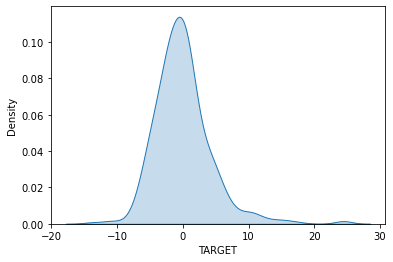

In [46]:
sns.kdeplot(residual,fill= True)

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

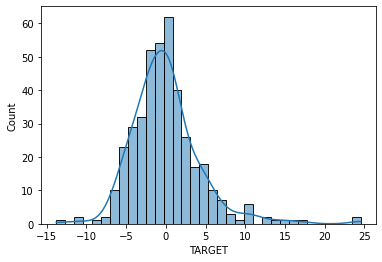

In [47]:
sns.histplot(residual,kde=True)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

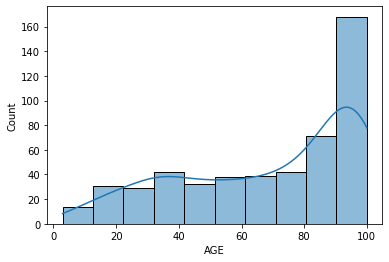

In [48]:
sns.histplot(df['AGE'],kde=True)

# Q-Q plot

In [49]:
import statsmodels.api as sm

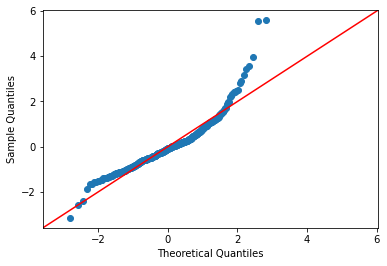

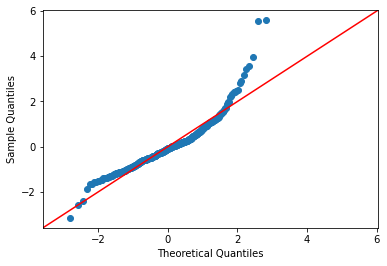

In [50]:
sm.qqplot(residual,line = '45',fit= True)

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

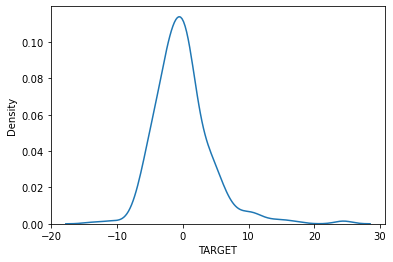

In [51]:
#skewness
sns.kdeplot(residual)

<AxesSubplot:xlabel='TARGET', ylabel='TARGET'>

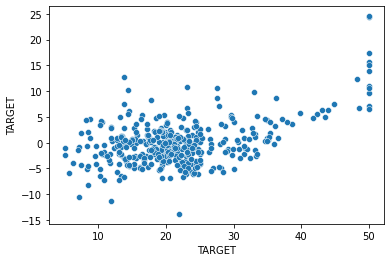

In [52]:
#Homescadasticity 
sns.scatterplot(x = y_train, y = residual)

In [53]:
import pickle

with open("Linear_Reg_Model.pkl","wb") as f:
    pickle.dump(linear_reg,f)

Regularization

In [54]:
linear_reg.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [55]:
s1 = pd.Series(linear_reg.coef_,index= x.columns)
s1

CRIM       -0.128181
ZN          0.063198
INDUS      -0.007576
CHAS        1.974515
NOX       -16.271989
RM          3.108456
AGE         0.016292
DIS        -1.483014
RAD         0.303988
TAX        -0.012082
PTRATIO    -0.820306
B           0.011419
LSTAT      -0.581626
dtype: float64

<AxesSubplot:>

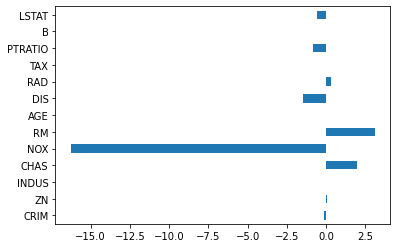

In [56]:
s1.plot(kind = 'barh')

# Losso Reg

In [57]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [58]:
lasso_model.score(x_train, y_train)

0.6887196863683032

In [59]:
lasso_model.score(x_test, y_test)

0.5350073630794524

In [60]:
## TRain Data Evaluation
lasso_model = Lasso(alpha=2)
lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 27.26479898425717
Root Mean Squared Error : 5.221570547666398
Mean Absolute Error : 3.667730589066432
R Squared Value is : 0.6457315726639181


In [61]:
# Testing Data Evaluation
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 54.31766793603104
Root Mean Squared Error : 7.370052098596797
Mean Absolute Error : 5.158900155417887
R Squared Value is : 0.4806150120331659


CRIM      -0.050258
ZN         0.053103
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         0.000000
AGE        0.053480
DIS       -0.067537
RAD        0.166107
TAX       -0.011416
PTRATIO   -0.341888
B          0.009239
LSTAT     -0.803590
dtype: float64


<AxesSubplot:>

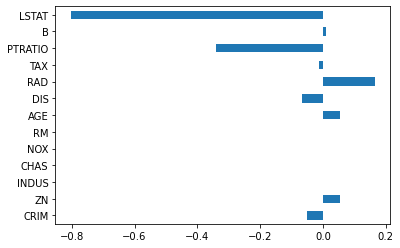

In [62]:
s1 = pd.Series(lasso_model.coef_, index = x.columns)
print(s1)
s1.plot(kind = 'barh')

# Ridge Red

In [63]:
## Train Data Evaluation
ridge_model = Ridge(alpha=3)
ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.64604026784903
Root Mean Squared Error : 4.432385392522748
Mean Absolute Error : 3.0988572110029327
R Squared Value is : 0.7447268254905919


In [64]:
# Testing Data Evaluation
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 35.5667220489687
Root Mean Squared Error : 5.963784205432713
Mean Absolute Error : 4.11936358388819
R Squared Value is : 0.6599113657607971


CRIM      -0.050258
ZN         0.053103
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         0.000000
AGE        0.053480
DIS       -0.067537
RAD        0.166107
TAX       -0.011416
PTRATIO   -0.341888
B          0.009239
LSTAT     -0.803590
dtype: float64


<AxesSubplot:>

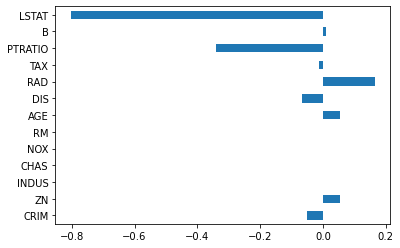

In [65]:
# s1 = pd.Series(ridge_model.coef_, index = x.columns)
print(s1)
s1.plot(kind = 'barh')

# Hyperparameter Tuning

Losso_reg

In [66]:
lasso_reg_model = Lasso()

hyperparameters = {"alpha" : np.arange(0.01, 5, 0.01)}
gscv_lasso_model = GridSearchCV(lasso_reg_model, hyperparameters, cv = 5)
gscv_lasso_model.fit(x_train, y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [67]:
gscv_lasso_model.best_params_

{'alpha': 0.01}

In [68]:
## TRain Data Evaluation
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.266146838119298
Root Mean Squared Error : 4.389321910969768
Mean Absolute Error : 3.0755889569253525
R Squared Value is : 0.7496630162170803


# Ridge Reg

In [69]:
## Train Data Evaluation
ridge_model = Ridge(alpha=0.26)
ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 19.254997196068246
Root Mean Squared Error : 4.388051640086776
Mean Absolute Error : 3.0774172318122415
R Squared Value is : 0.7498078904249214


In [70]:
# Testing Data Evaluation
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 34.58558868876501
Root Mean Squared Error : 5.880951342152476
Mean Absolute Error : 4.059891855240904
R Squared Value is : 0.6692929529652292


In [71]:
result = pd.DataFrame({"Linear Reg":[34.41,5.8, 4.06, 0.67],
                       'Lasso Reg':[34.41,5.8, 4.06, 0.67], 
                       'Ridge Reg':[34.41,5.8, 4.06, 0.67]}, index = ['MSE', 'RMSE','MAE', 'R2'])
result

,Linear Reg,Lasso Reg,Ridge Reg
MSE,34.41,34.41,34.41
RMSE,5.80,5.80,5.80
MAE,4.06,4.06,4.06
R2,0.67,0.67,0.67
